In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="white", color_codes=True)

from deepymod_torch.library_function import *
from deepymod_torch.DeepMod import DeepMoD
from deepymod_torch.neural_net import *
from deepymod_torch.sparsity import *


np.random.seed(40)
%load_ext autoreload
%autoreload 2

#sys.path.append('../src/deepymod/')
#from DeepMoD import DeepMoD
#from library_functions import *
#from deepymod.utilities import library_matrix_mat, print_PDE

In [2]:
def shift(test):
    return test[:-1]+np.diff(test)[0]/2

Loading in the data as a data-frame 

In [3]:
myFile_pd = pd.read_csv('../data/raw/SPT/data_video5.csv', sep=',')

In [4]:
myFile_pd.head()

,Unnamed: 0,Frame,x1,y1,x2,y2,x3,y3,x4,y4,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
0,0,1,497.0,571.0,1429,961,330,1057,489,495,...,492,67,1211,358,368,67,1440,926,131,651
1,1,2,498.0,572.0,1429,962,330,1055,490,496,...,492,68,1212,358,368,65,1439,926,130,651
2,2,3,498.0,572.0,1428,963,329,1055,490,495,...,491,67,1211,359,368,67,1440,926,129,649
3,3,4,498.0,572.0,1428,963,329,1054,490,496,...,491,67,1212,360,369,66,1440,926,130,650
4,4,5,499.0,572.0,1429,962,330,1055,489,497,...,491,67,1212,360,368,66,1440,926,129,649


Selecting the x and y values of the data and substacting the initial position to make all particles start at (x,y) = (0,0)

In [5]:
x_list = pd.concat([myFile_pd['x1'],myFile_pd['x2'],myFile_pd['x3'],myFile_pd['x4'],myFile_pd['x5'],myFile_pd['x6'],myFile_pd['x7']],axis=1)
y_list = pd.concat([myFile_pd['y1'],myFile_pd['y2'],myFile_pd['y3'],myFile_pd['y4'],myFile_pd['y5'],myFile_pd['y6'],myFile_pd['y7']],axis=1)
x_list = x_list-x_list.values.squeeze()[0]
y_list = y_list-y_list.values.squeeze()[0]

In [6]:
x_list = pd.concat([myFile_pd['x1'],myFile_pd['x2'],myFile_pd['x3'],myFile_pd['x4'],myFile_pd['x5'],myFile_pd['x6'],myFile_pd['x7'],myFile_pd['x8'],myFile_pd['x9'],myFile_pd['x10'],myFile_pd['x11'],myFile_pd['x12'],myFile_pd['x13'],myFile_pd['x14'],myFile_pd['x15'],myFile_pd['x16'],myFile_pd['x17'],myFile_pd['x18'],myFile_pd['x19'],myFile_pd['x20'],myFile_pd['x21']],axis=1)
y_list = pd.concat([myFile_pd['y1'],myFile_pd['y2'],myFile_pd['y3'],myFile_pd['y4'],myFile_pd['y5'],myFile_pd['y6'],myFile_pd['y7'],myFile_pd['y8'],myFile_pd['y9'],myFile_pd['y10'],myFile_pd['y11'],myFile_pd['y12'],myFile_pd['y13'],myFile_pd['y14'],myFile_pd['y15'],myFile_pd['y16'],myFile_pd['y17'],myFile_pd['y18'],myFile_pd['y19'],myFile_pd['y20'],myFile_pd['y21']],axis=1)
x_list = x_list-x_list.values.squeeze()[0]
y_list = y_list-y_list.values.squeeze()[0]

In [7]:
x_position_array = np.asarray(x_list.values.squeeze())
y_position_array = np.asarray(y_list.values.squeeze())

m is the amount of individual trajectories that you want to split your dataset into.

In [8]:
m = 55
L_cuts = np.int(x_position_array.shape[0]/m)
x_array = x_position_array[0:L_cuts][:,1:]
y_array = y_position_array[0:L_cuts][:,1:]

In [9]:
for i in range(1,m):
    temp_array_x= x_position_array[i*L_cuts:(i+1)*L_cuts] - x_position_array[i*L_cuts]
    temp_array_y= y_position_array[i*L_cuts:(i+1)*L_cuts] - y_position_array[i*L_cuts]
    x_array= np.hstack((x_array,temp_array_x[:,1:]))
    y_array= np.hstack((y_array,temp_array_y[:,1:]))

In [10]:
msd = np.sqrt(x_array**2 + y_array**2)

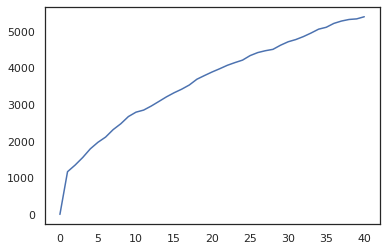

In [11]:
plt.plot(np.sum(msd,axis=1))

In [12]:
len(np.sum(msd,axis=1))

41

In [13]:
np.arange(0,len(np.sum(msd,axis=1)))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [14]:
np.polyfit(np.arange(0,len(np.sum(msd,axis=1))),np.sum(msd,axis=1), 1, rcond=None, full=False, w=None, cov=False)

array([ 109.35655503, 1445.79196677])

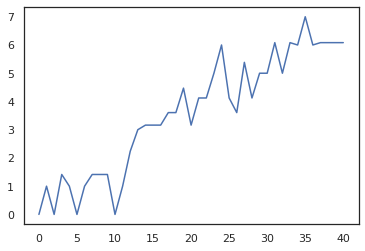

In [15]:
plt.plot(msd[:,3])

In [16]:
import seaborn as sns;

In [17]:
x_array.shape

(41, 1100)

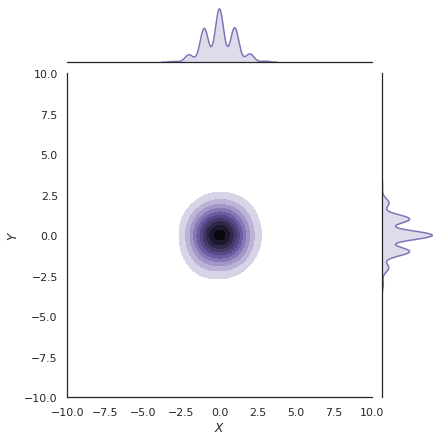

In [18]:
time=2
g = sns.jointplot(x=x_array[time],y=y_array[time], kind="kde", color="m",xlim=(-10,10),ylim=(-10,10), bw=0.75)
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

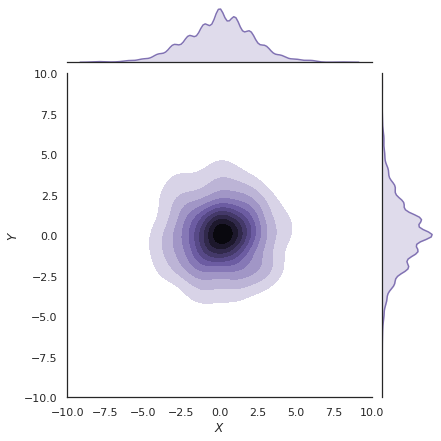

In [19]:
time=10
g = sns.jointplot(x=x_array[time],y=y_array[time], kind="kde", color="m",xlim=(-10,10),ylim=(-10,10), bw=0.75)
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

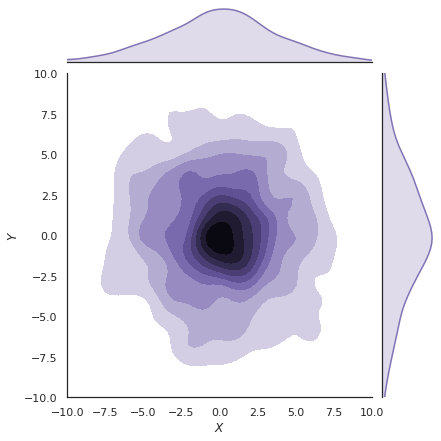

In [22]:
time=40
g = sns.jointplot(x=x_array[time],y=y_array[time], kind="kde", color="m",xlim=(-10,10),ylim=(-10,10), bw=0.75)
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

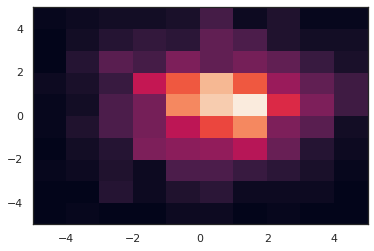

In [23]:
plt.hist2d(x=x_array[9],y=y_array[9],bins=10,range=[[-5,5],[-5,5]],density=True)
plt.show()

In [24]:
histo=np.histogram2d(x=x_array[0],y=y_array[0],bins=10,range=[[-5,5],[-5,5]])
U = np.empty(histo[0].shape).flatten()
x_m, y_m = np.meshgrid(histo[1].flatten()[:-1], histo[1].flatten()[:-1])
X_m= np.empty(x_m.shape).flatten()
Y_m= np.empty(y_m.shape).flatten()
T = np.empty(x_m.shape).flatten()

In [27]:
for t in range(1,len(x_array)):
    print(t)
    histo=np.histogram2d(x=x_array[t],y=y_array[t],bins=10,range=[[-5,5],[-5,5]])
    u = histo[0].flatten()
    x_m, y_m = np.meshgrid(shift(histo[1].flatten()), shift(histo[1].flatten()))
    t = t*np.ones_like(x_m).flatten()
    X_m = np.vstack([X_m,x_m.flatten()])
    Y_m = np.vstack([Y_m,y_m.flatten()])
    T = np.vstack([T,t])
    U = np.vstack([U,u])
X_m= X_m[1:]
Y_m= Y_m[1:]
T = T[1:]
U = U[1:]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [28]:
X = np.transpose((T.flatten(),X_m.flatten(), Y_m.flatten()))
y = U.reshape((U.size, 1))/10.0

print(X.shape, y.shape)

(4000, 3) (4000, 1)


# DeepMoD

In [29]:
number_of_samples = 1000

idx = np.random.permutation(y.size)
X_train = torch.tensor(X[idx, :][:number_of_samples], dtype=torch.float32, requires_grad=True)
y_train = torch.tensor(y[idx, :][:number_of_samples], dtype=torch.float32)

In [30]:
print(X_train.shape, y_train.shape)

torch.Size([1000, 3]) torch.Size([1000, 1])


In [42]:
optim_config = {'lambda': 10**-8, 'max_iterations': 25001}

In [32]:
network_config = {'input_dim': 3, 'hidden_dim': 20, 'layers': 3, 'output_dim': y_train.shape[1]}

In [33]:
library_config = {'type': library_1D_in_group_c, 'poly_order': 0, 'diff_order': 2}

In [34]:
network, coeff_vector_list, sparsity_mask_list = deepmod_init(network_config, library_config)

1


In [ ]:
time_deriv_list, theta, coeff_vector_list = train_group(X_train, y_train, network, coeff_vector_list, sparsity_mask_list, library_config, optim_config)

Epoch | Total loss | MSE | PI | L1 
0 2.4E-02 2.1E-02 2.5E-03 1.3E-08
tensor([[-0.0170],
        [-0.0169],
        [ 0.0052],
        [-0.0049]], requires_grad=True)
5000 2.1E-02 1.9E-02 2.4E-03 1.3E-08
tensor([[-0.0074],
        [-0.0245],
        [ 0.0091],
        [-0.0003]], requires_grad=True)
10000 1.8E-02 1.6E-02 2.2E-03 1.3E-08
tensor([[-0.0019],
        [-0.0292],
        [ 0.0083],
        [-0.0004]], requires_grad=True)
15000 1.6E-02 1.4E-02 2.3E-03 1.4E-08
tensor([[-0.0012],
        [-0.0346],
        [ 0.0074],
        [-0.0001]], requires_grad=True)


In [40]:
coeff_vector_list 

[tensor([[-2.6544e-02],
         [-2.4127e-02],
         [ 1.2121e-02],
         [ 5.1425e-05]], requires_grad=True)]

In [37]:
X_all = torch.tensor(X, dtype=torch.float32, requires_grad=True) 
prediction_full = network(X_all)

In [38]:
plt.imshow(prediction_full.detach().numpy().reshape(10,10,10)[5,:,:].T, aspect=1)

ValueError: cannot reshape array of size 4000 into shape (10,10,10)

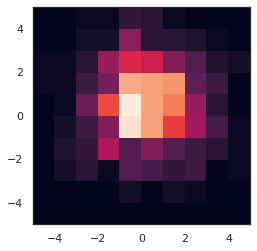

In [45]:
time = 5
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist2d(x=x_array[time],y=y_array[time],bins=10,range=[[-5,5],[-5,5]])
ax.set_aspect(aspect=1)
plt.show()

# Find the maximal values

In [283]:
U = np.empty(histo[0].shape).flatten()
for t in range(1,len(x_array)):
    print(t)
    histo=np.histogram2d(x=x_array[t],y=y_array[t],bins=20,range=[[-10,10],[-10,10]])
    u = histo[0].flatten()
    x_m, y_m = np.meshgrid(histo[1].flatten()[:-1], histo[1].flatten()[:-1])
    t = np.ones_like(x_m).flatten()
    U = np.vstack([U,u])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [161]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

im0 = axes[0].contourf(x_m, y_v, u, cmap='coolwarm')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('t = 0')

im1 = axes[1].contourf(x_v[:,:,10], y_v[:,:,10], u_v[:,:,10], cmap='coolwarm')
axes[1].set_xlabel('x')
axes[1].set_title('t = 10')

im2 = axes[2].contourf(x_v[:,:,20], y_v[:,:,20], u_v[:,:,20], cmap='coolwarm')
axes[2].set_xlabel('x')
axes[2].set_title('t= 20')

fig.colorbar(im1, ax=axes.ravel().tolist())

plt.show()

In [162]:
x_m.shape

(41, 1600)

In [132]:
for i in range(0,len(x_array)):
    histo=np.histogram2d(x=x_array[i],y=y_array[i],bins=40)[0]
    position_max=np.where(histo == np.amax(histo))
    if len(position_max[0]) ==1:
        print(np.squeeze(position_max))
    else:
        print(np.squeeze(position_max[0]))

[20 20]
[20 16]
[20 20]
[17 22]
[20 20]
[17 22]
[16 20]
[21 16]
[21 17]
[24 18]
[23 20]
[22 22]
[21 21]
[18 21]
[21 18]
[21 18]
[15 20]
[14 21]
[14 16]
[16 21]
[14 21]


In [113]:
histo=np.histogram2d(x=x_array[5],y=y_array[5],bins=20)[0]
position_max=np.where(histo == np.amax(histo))
print(position_max)

(array([ 8, 11]), array([11, 11]))


In [114]:
np.amax(histo)

20.0

In [117]:
len(np.where(histo == np.amax(histo)))

2